# Differentiation

* Simple / 2-Point Method
* 3-Point Method - "higher error | works for endpoints"
* 5-Point Method - "lesser error | does not work for endpoints"


* Orders: First and Second

### Notes:
Using Newton's Difference Quotient:
$$f^{(n)}(x)=\lim _{h\to 0}{\frac {1}{h^{n}}}\sum _{k=0}^{n}(-1)^{k+n}{\binom {n}{k}}f(x+kh)$$

In [1]:
# Basic Imports
import numpy as np, scipy as sc, matplotlib.pyplot as plt

## Simple Method

* Newton's Difference Quotient:
$$f'(x_i) = \frac{f(x_i + h) - f(x_i)}{h} + \mathcal{O}(hf'')$$

In [2]:
def del_simp_f(x, func, step):
    """
    INPUT:
    x: numpy array | Stores values in the differentiation range
    func: Function, to be differentiated
    step: Step-size
    OUTPUT:
    df: numpy array | Stores SECOND order derivative values
    f_mod: numpy array | Stores truncated array (First and last element removed)
    """
    f = func(x) # Stores functional values
    f_mod = f[1:-1]
    df = np.zeros_like(x)
    
    for i in range(f.size):
        if i > 0 and i < f.size-1:
            df[i] = (f[i+1] - f[i])/step
            
    return df[1:-1], f_mod

## 3-Point Method
$$f'(x_i) = \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + \mathcal{O}(h^2f^{(3)})$$
Or,$$f'(x_i) = \frac{f(x_{i+2}) - f(x_{i-2})}{4h} + \mathcal{O}(h^2f^{(3)})$$


In [1]:
def del_3p_f(x, func, step, symm=3):
    """
    INPUT:
    x: numpy array | Stores values in the differentiation range
    func: Function, to be differentiated
    step: Step-size
    symm: Symmeteric Difference, around 3 points or 5 points
    OUTPUT:
    df: numpy array | Stores FIRST order derivative values
    f_mod: numpy array | Stores truncated array (First and last element removed)
    """
    f = func(x) # Stores functional values
    f_mod = f[1:-1]
    df = np.zeros_like(x)
    
    # Three-point Derivative - 1
    if symm == 3:
        for i in range(f.size):
            if i > 0 and i < f.size-1:
                df[i] = (f[i+1] - f[i-1])/(2*step)

    # Three-point Derivative - 2
    elif symm == 5:
        for i in range(f.size):
            if i > 1 and i < f.size-2:
                df[i] = (f[i+2] - f[i-2])/(4*step)
    
    return df[1:-1], f_mod

## 5-Point Method
$$f'(x_i)={\frac {-f(x_{i+2})+8f(x_{i+1})-8f(x_{i-1})+f(x_{i-2})}{12h}} + \mathcal{O}\left({\frac {h^{4}}{30}}f^{(5)}(c)\right)$$

In [4]:
def del_5p_f(x, func, step):
    """
    INPUT:
    x: numpy array | Stores values in the differentiation range
    func: Function, to be differentiated
    step: Step-size
    OUTPUT:
    df: numpy array | Stores FIRST order derivative values
    f_mod: numpy array | Stores truncated array (First 2 and last 2 elements removed)
    """
    f = func(x) # Stores functional values
    f_mod = f[2:-2]
    df = np.zeros_like(x)
    
    for i in range(f.size):
        if i > 1 and i < f.size-2:
            df[i] = (-f[i+2] +8*f[i+1] - 8*f[i-1] + f[i-2])/(12*step)

    return df[2:-2], f_mod

## Second Order Derivative - Double Derivative
$$f''(x_i) = \frac{f(x_{i+1}) + f(x_{i-1}) - 2f(x_i)}{h^2} + \mathcal{O}(h^2f^{(4)})$$

In [5]:
def del2_f(x, func, step):
    """
    INPUT:
    x: numpy array | Stores values in the differentiation range
    func: Function, to be differentiated
    step: Step-size
    OUTPUT:
    d2f: numpy array | Stores SECOND order derivative values
    f_mod: numpy array | Stores truncated array (First and last element removed)
    """
    f = func(x) # Stores functional values
    f_mod = f[1:-1]
    d2f = np.zeros_like(x)
    
    for i in range(f.size):
        if i > 0 and i < f.size-1:
            d2f[i] = (f[i+1] + f[i-1] - 2*f[i])/(step**2)
            
    return d2f[1:-1], f_mod

## FOR TESTING PURPOSES

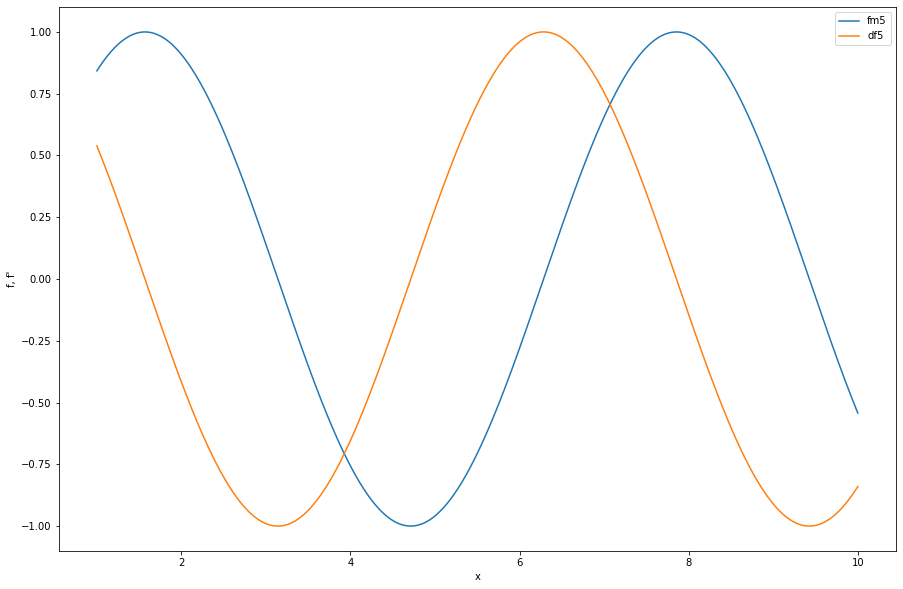

In [6]:
STEP = 0.001
a, b = 1, 10
N = np.ceil((b-a)/STEP)
x = np.linspace(a, b, N)
f = lambda x: np.sin(x)

dsf, fms = del_simp_f(x, f, STEP)
df3_1, fm3_1 = del_3p_f(x, f, STEP, symm=3)
df3_2, fm3_2 = del_3p_f(x, f, STEP, symm=5)
df5, fm5 = del_5p_f(x, f, STEP)

d2f, fm = del2_f(x, f, STEP)

plt.figure(figsize=(15,10))
# plt.plot(x, f, label="f = sin(x)")
plt.xlabel("x")
plt.ylabel("f, f'")

plt.plot(x[2:-2], fm5, label="fm5")

plt.plot(x[2:-2], df5, label="df5")
# plt.plot(x, df5)

# g = np.cos(x)
# plt.plot(x, g, label="cos(x)")

plt.legend(loc="upper right")